In [1]:
# installing package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from numpy import random
from numpy import mean
from numpy import std
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
# importing data

# data import -- google colab
#from google.colab import drive
#drive.mount('/content/drive')
#file_path = '/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv'
#df = pd.read_csv(file_path)
# data import -- jupyter notebook
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df = df.rename(columns={'family_history_with_overweight': 'FHWO', 'NObeyesdad' : 'Obesity Level',})
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
for i in cat_cols:
    col_val = sorted(list(set(df[i].tolist())))
    replace_num = []
    for j in range(len(col_val)):
        replace_num.append(j)
    df[i].replace(col_val,replace_num, inplace=True)
outlier_index = [18, 21, 25, 30, 68, 92, 119, 132, 133, 142, 152, 188, 191, 200, 217, 232, 236, 245, 252, 277, 333, 495]
df_remove_outliers = df
df_remove_outliers = df_remove_outliers.drop(outlier_index)
df_remove_outliers = df_remove_outliers.reset_index(drop=True)

columns = ['Height', 'Weight']
df_remove_outliers.drop(columns, inplace=True, axis=1)
df.drop(columns, inplace=True, axis=1)

In [2]:
#Implement Random Forest with best features and best parameters
features = ['Age', 'Gender', 'FHWO', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
scaler = MinMaxScaler()
X = scaler.fit_transform(df_remove_outliers[features])

target_name = 'Obesity Level'
y = df_remove_outliers[target_name]

train_features, test_features, train_labels, test_labels = train_test_split(
    X, y, train_size=0.8, random_state=42)

rfc_best = RandomForestClassifier(criterion ='gini', max_depth = 50, max_features = 'log2', min_samples_leaf=1, min_samples_split = 2, n_estimators = 1000)
rfc_best.fit(train_features, train_labels)

train_score = rfc_best.score(train_features, train_labels)
test_score = rfc_best.score(test_features, test_labels)

rfc_pred = rfc_best.predict(test_features)


report_best = classification_report(test_labels, rfc_pred, digits=4)

print('Random Forest Model:')
print('Train accuracy:', train_score)
print('Test accuracy:', test_score)
print('Classification Report of Random Forest Classifier : \n', report_best)

Random Forest Model:
Train accuracy: 1.0
Test accuracy: 0.8660287081339713
Classification Report of Random Forest Classifier : 
               precision    recall  f1-score   support

           0     0.9434    0.8333    0.8850        60
           1     0.6324    0.8269    0.7167        52
           2     0.9123    0.8125    0.8595        64
           3     0.9219    0.9365    0.9291        63
           4     1.0000    0.9865    0.9932        74
           5     0.8200    0.7885    0.8039        52
           6     0.8302    0.8302    0.8302        53

    accuracy                         0.8660       418
   macro avg     0.8657    0.8592    0.8597       418
weighted avg     0.8770    0.8660    0.8689       418



In [3]:
# female = 0 and male = 1
df_male = df_remove_outliers[df_remove_outliers['Gender'] == 1] 
df_female = df_remove_outliers[df_remove_outliers['Gender'] == 0]
# Young Adult = less than 30 yrs old, Middle-aged Adult = 31 ~ 45 yrs old, Old-aged Adult = above 45 yrs old
df_y = df_remove_outliers[df_remove_outliers['Age'] <= 30]
df_m = df_remove_outliers[(df_remove_outliers['Age'] >= 31) & (df_remove_outliers['Age'] <= 45)]
df_o = df_remove_outliers[df_remove_outliers['Age'] > 45]

In [4]:
# male population
features = ['Age', 'Gender', 'FHWO', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
scaler = StandardScaler()
X = scaler.fit_transform(df_male[features])

target_name = 'Obesity Level'
y = df_male[target_name]

train_features, test_features, train_labels, test_labels = train_test_split(
    X, y, train_size=0.8, random_state=42)

rfc_best = RandomForestClassifier(criterion ='gini', max_depth = 50, max_features = 'log2', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 1000)
rfc_best.fit(train_features, train_labels)

train_score = rfc_best.score(train_features, train_labels)
test_score = rfc_best.score(test_features, test_labels)

rfc_pred = rfc_best.predict(test_features)


report_best = classification_report(test_labels, rfc_pred, digits=4)

print('Random Forest Model (male population):')
print('Train accuracy:', train_score)
print('Test accuracy:', test_score)
print('Classification Report of Random Forest Classifier : \n', report_best)

Random Forest Model (male population):
Train accuracy: 1.0
Test accuracy: 0.8113207547169812
Classification Report of Random Forest Classifier : 
               precision    recall  f1-score   support

           0     0.9231    0.8276    0.8727        29
           1     0.5667    0.6800    0.6182        25
           2     0.8966    0.7647    0.8254        34
           3     0.9138    0.9298    0.9217        57
           5     0.7857    0.8148    0.8000        27
           6     0.7317    0.7500    0.7407        40

    accuracy                         0.8113       212
   macro avg     0.8029    0.7945    0.7965       212
weighted avg     0.8207    0.8113    0.8141       212



In [5]:
# female population
features = ['Age', 'Gender', 'FHWO', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
scaler = StandardScaler()
X = scaler.fit_transform(df_female[features])

target_name = 'Obesity Level'
y = df_female[target_name]

train_features, test_features, train_labels, test_labels = train_test_split(
    X, y, train_size=0.8, random_state=42)

rfc_best = RandomForestClassifier(criterion ='gini', max_depth = 50, max_features = 'log2', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 1000)
rfc_best.fit(train_features, train_labels)

train_score = rfc_best.score(train_features, train_labels)
test_score = rfc_best.score(test_features, test_labels)

rfc_pred = rfc_best.predict(test_features)


report_best = classification_report(test_labels, rfc_pred, digits=4)

print('Random Forest Model (female population):')
print('Train accuracy:', train_score)
print('Test accuracy:', test_score)
print('Classification Report of Random Forest Classifier : \n', report_best)

Random Forest Model (female population):
Train accuracy: 1.0
Test accuracy: 0.8888888888888888
Classification Report of Random Forest Classifier : 
               precision    recall  f1-score   support

           0     0.9000    0.9231    0.9114        39
           1     0.7083    0.6296    0.6667        27
           2     0.8387    0.8667    0.8525        30
           3     0.0000    0.0000    0.0000         1
           4     1.0000    1.0000    1.0000        66
           5     0.7600    1.0000    0.8636        19
           6     0.9524    0.8000    0.8696        25

    accuracy                         0.8889       207
   macro avg     0.7371    0.7456    0.7377       207
weighted avg     0.8871    0.8889    0.8853       207



/Users/smy/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/smy/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/smy/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
# Young Adult population
features = ['Age', 'Gender', 'FHWO', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
scaler = MinMaxScaler()
X = scaler.fit_transform(df_y[features])

target_name = 'Obesity Level'
y = df_y[target_name]

train_features, test_features, train_labels, test_labels = train_test_split(
    X, y, train_size=0.8, random_state=42)

rfc_best = RandomForestClassifier()
rfc_best.fit(train_features, train_labels)

train_score = rfc_best.score(train_features, train_labels)
test_score = rfc_best.score(test_features, test_labels)

rfc_pred = rfc_best.predict(test_features)


report_best = classification_report(test_labels, rfc_pred, digits=4)

print('Random Forest Model (Young Adult population):')
print('Train accuracy:', train_score)
print('Test accuracy:', test_score)
print('Classification Report of Random Forest Classifier : \n', report_best)

Random Forest Model (Young Adult population):
Train accuracy: 1.0
Test accuracy: 0.8477011494252874
Classification Report of Random Forest Classifier : 
               precision    recall  f1-score   support

           0     0.9167    0.9016    0.9091        61
           1     0.6452    0.7843    0.7080        51
           2     0.8824    0.9000    0.8911        50
           3     0.7778    0.9655    0.8615        29
           4     1.0000    1.0000    1.0000        62
           5     0.7619    0.6957    0.7273        46
           6     0.9429    0.6735    0.7857        49

    accuracy                         0.8477       348
   macro avg     0.8467    0.8458    0.8404       348
weighted avg     0.8585    0.8477    0.8479       348



In [7]:
# Mid-Aged Adult population
features = ['Age', 'Gender', 'FHWO', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
scaler = MinMaxScaler()
X = scaler.fit_transform(df_m[features])

target_name = 'Obesity Level'
y = df_m[target_name]

train_features, test_features, train_labels, test_labels = train_test_split(
    X, y, train_size=0.8, random_state=42)

rfc_best = RandomForestClassifier()
rfc_best.fit(train_features, train_labels)

train_score = rfc_best.score(train_features, train_labels)
test_score = rfc_best.score(test_features, test_labels)

rfc_pred = rfc_best.predict(test_features)


report_best = classification_report(test_labels, rfc_pred, digits=4)

print('Random Forest Model (Mid-Aged Adult population):')
print('Train accuracy:', train_score)
print('Test accuracy:', test_score)
print('Classification Report of Random Forest Classifier : \n', report_best)

Random Forest Model (Mid-Aged Adult population):
Train accuracy: 1.0
Test accuracy: 0.8771929824561403
Classification Report of Random Forest Classifier : 
               precision    recall  f1-score   support

           1     0.5000    0.5000    0.5000         2
           2     0.8824    0.9375    0.9091        16
           3     1.0000    0.8667    0.9286        15
           5     1.0000    1.0000    1.0000        11
           6     0.7143    0.7692    0.7407        13

    accuracy                         0.8772        57
   macro avg     0.8193    0.8147    0.8157        57
weighted avg     0.8843    0.8772    0.8790        57



In [8]:
# Old-Aged Adult population
features = ['Age', 'Gender', 'FHWO', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
scaler = MinMaxScaler()
X = scaler.fit_transform(df_o[features])

target_name = 'Obesity Level'
y = df_o[target_name]

train_features, test_features, train_labels, test_labels = train_test_split(
    X, y, train_size=0.8, random_state=42)

rfc_best = RandomForestClassifier()
rfc_best.fit(train_features, train_labels)

train_score = rfc_best.score(train_features, train_labels)
test_score = rfc_best.score(test_features, test_labels)

rfc_pred = rfc_best.predict(test_features)


report_best = classification_report(test_labels, rfc_pred, digits=4)

print('Random Forest Model (Old-Aged Adult population):')
print('Train accuracy:', train_score)
print('Test accuracy:', test_score)
print('Classification Report of Random Forest Classifier : \n', report_best)

Random Forest Model (Old-Aged Adult population):
Train accuracy: 1.0
Test accuracy: 1.0
Classification Report of Random Forest Classifier : 
               precision    recall  f1-score   support

           6     1.0000    1.0000    1.0000         2

    accuracy                         1.0000         2
   macro avg     1.0000    1.0000    1.0000         2
weighted avg     1.0000    1.0000    1.0000         2



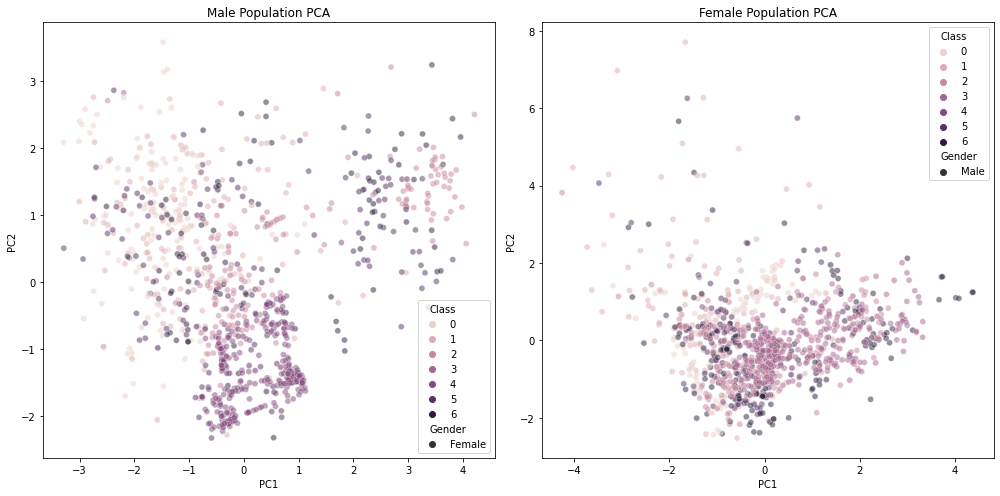

In [12]:
scaler = StandardScaler()
X_male = scaler.fit_transform(df_male[features])
X_female = scaler.fit_transform(df_female[features])
y_male = df_male[target_name]
y_female = df_female[target_name]

pca = PCA(n_components=2)
X_male_pca = pca.fit_transform(X_male)
X_female_pca = pca.fit_transform(X_female)

combined_pca = np.vstack((X_male_pca, X_female_pca))
combined_labels = np.hstack((y_male, y_female))
combined_gender = np.array(['Male'] * X_male_pca.shape[0] + ['Female'] * X_female_pca.shape[0])

df_pca = pd.DataFrame(combined_pca, columns=['PC1', 'PC2'])
df_pca['Class'] = combined_labels
df_pca['Gender'] = combined_gender

# Start plotting
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sb.scatterplot(x='PC1', y='PC2', hue='Class', style='Gender', data=df_pca[df_pca['Gender'] == 'Female'], alpha=0.5)
plt.title('Male Population PCA')
plt.subplot(1, 2, 2)
sb.scatterplot(x='PC1', y='PC2', hue='Class', style='Gender', data=df_pca[df_pca['Gender'] == 'Male'], alpha=0.5)
plt.title('Female Population PCA')

plt.tight_layout()
plt.show()